<a href="https://colab.research.google.com/github/im-young/deeplearning_study/blob/main/yolo_v5_%EC%9A%B0%EC%9C%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 연결

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# roboflow 데이터 불러오기

In [ ]:
# 절대 경로를 바꾸는 것
%cd /content/drive/MyDrive
 # 이거 설치하면 MyDrive 에 yolov5 폴더가 생김
 # 이거 안하면 content 밑에 yolov5 폴더가 생긴다.

/content/drive/MyDrive


In [ ]:
# roboflow 코드 복사
# 위의 코드 실행을 안시키면 불러오면 끄고 킬때마다 작동 시켜야함 

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NAj0ccPfb1vRSzTXODCQ")
project = rf.workspace("jy-wvf8o").project("-d1zim")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to 청치마-1 in yolov5pytorch:: 100%|██████████| 620/620 [00:03<00:00, 180.48it/s]


# 라이브러리

In [ ]:
#!unzip -q ../train_data.zip -d ../
# 이미지 데이터를 갖고 올때  zip 파일 형식일 때 이거 사용

In [ ]:
# 이미지 모듈
from IPython.display import Image

In [ ]:
# # 절대 경로를 바꾸는 것
# %cd /content/drive/MyDrive
#  # 이거 설치하면 MyDrive 에 yolov5 폴더가 생김
#  # 이거 안하면 content 밑에 yolov5 폴더가 생긴다.

/content/drive/MyDrive


In [ ]:
# 토치랑 유틸 import 
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install 욜로를 돌릴떄 필요한 패키지 설치

import torch
import utils
display = utils.notebook_init()  # checks89 별로 안중요함

# MyDrive에 yolo5 폴더가 생김

YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.1/78.2 GB disk)


# 모델 학습

- data.yaml의 test, val, train 파일의 iamage 경로를 모두 복사해와서 변경하기

- 런타임 GPU로 바꾸기



---




--img : 학습할 이미지의 크기

--batch : 한 번에 학습할 이미지들의 양(batch)

--epochs : 학습할 에폭시의 수

--data : 원하는 데이터 셋의 경로를 담은 data.yaml

--weights : 전이학습을 위해 미리 학습된 weights들을 담은 pt 파일

--cfg : 원하는 모델의 경로를 담은 yaml 파일의 위치( 위에서 weight를 사용하는 것에 따라 변화 )(나노, 스몰, 미디움...)

--patience : early stopping


In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 60 --data /content/drive/MyDrive/청치마-1/data.yaml --weights yolov5s.pt --cache --patience 10
# train.py : 데이터를 훈련시키는 파라미터/--data : 데이터 경로/--weights: 가중치 (my drive>yolo5 > models 중 하나(이 파일을 갖고 오는게 아니라서 확장자 명이 다름, 파일명만 같게함))

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/청치마-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=10, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0

Results saved to runs/train/exp2 : 결과값이 담겨있는 폴더

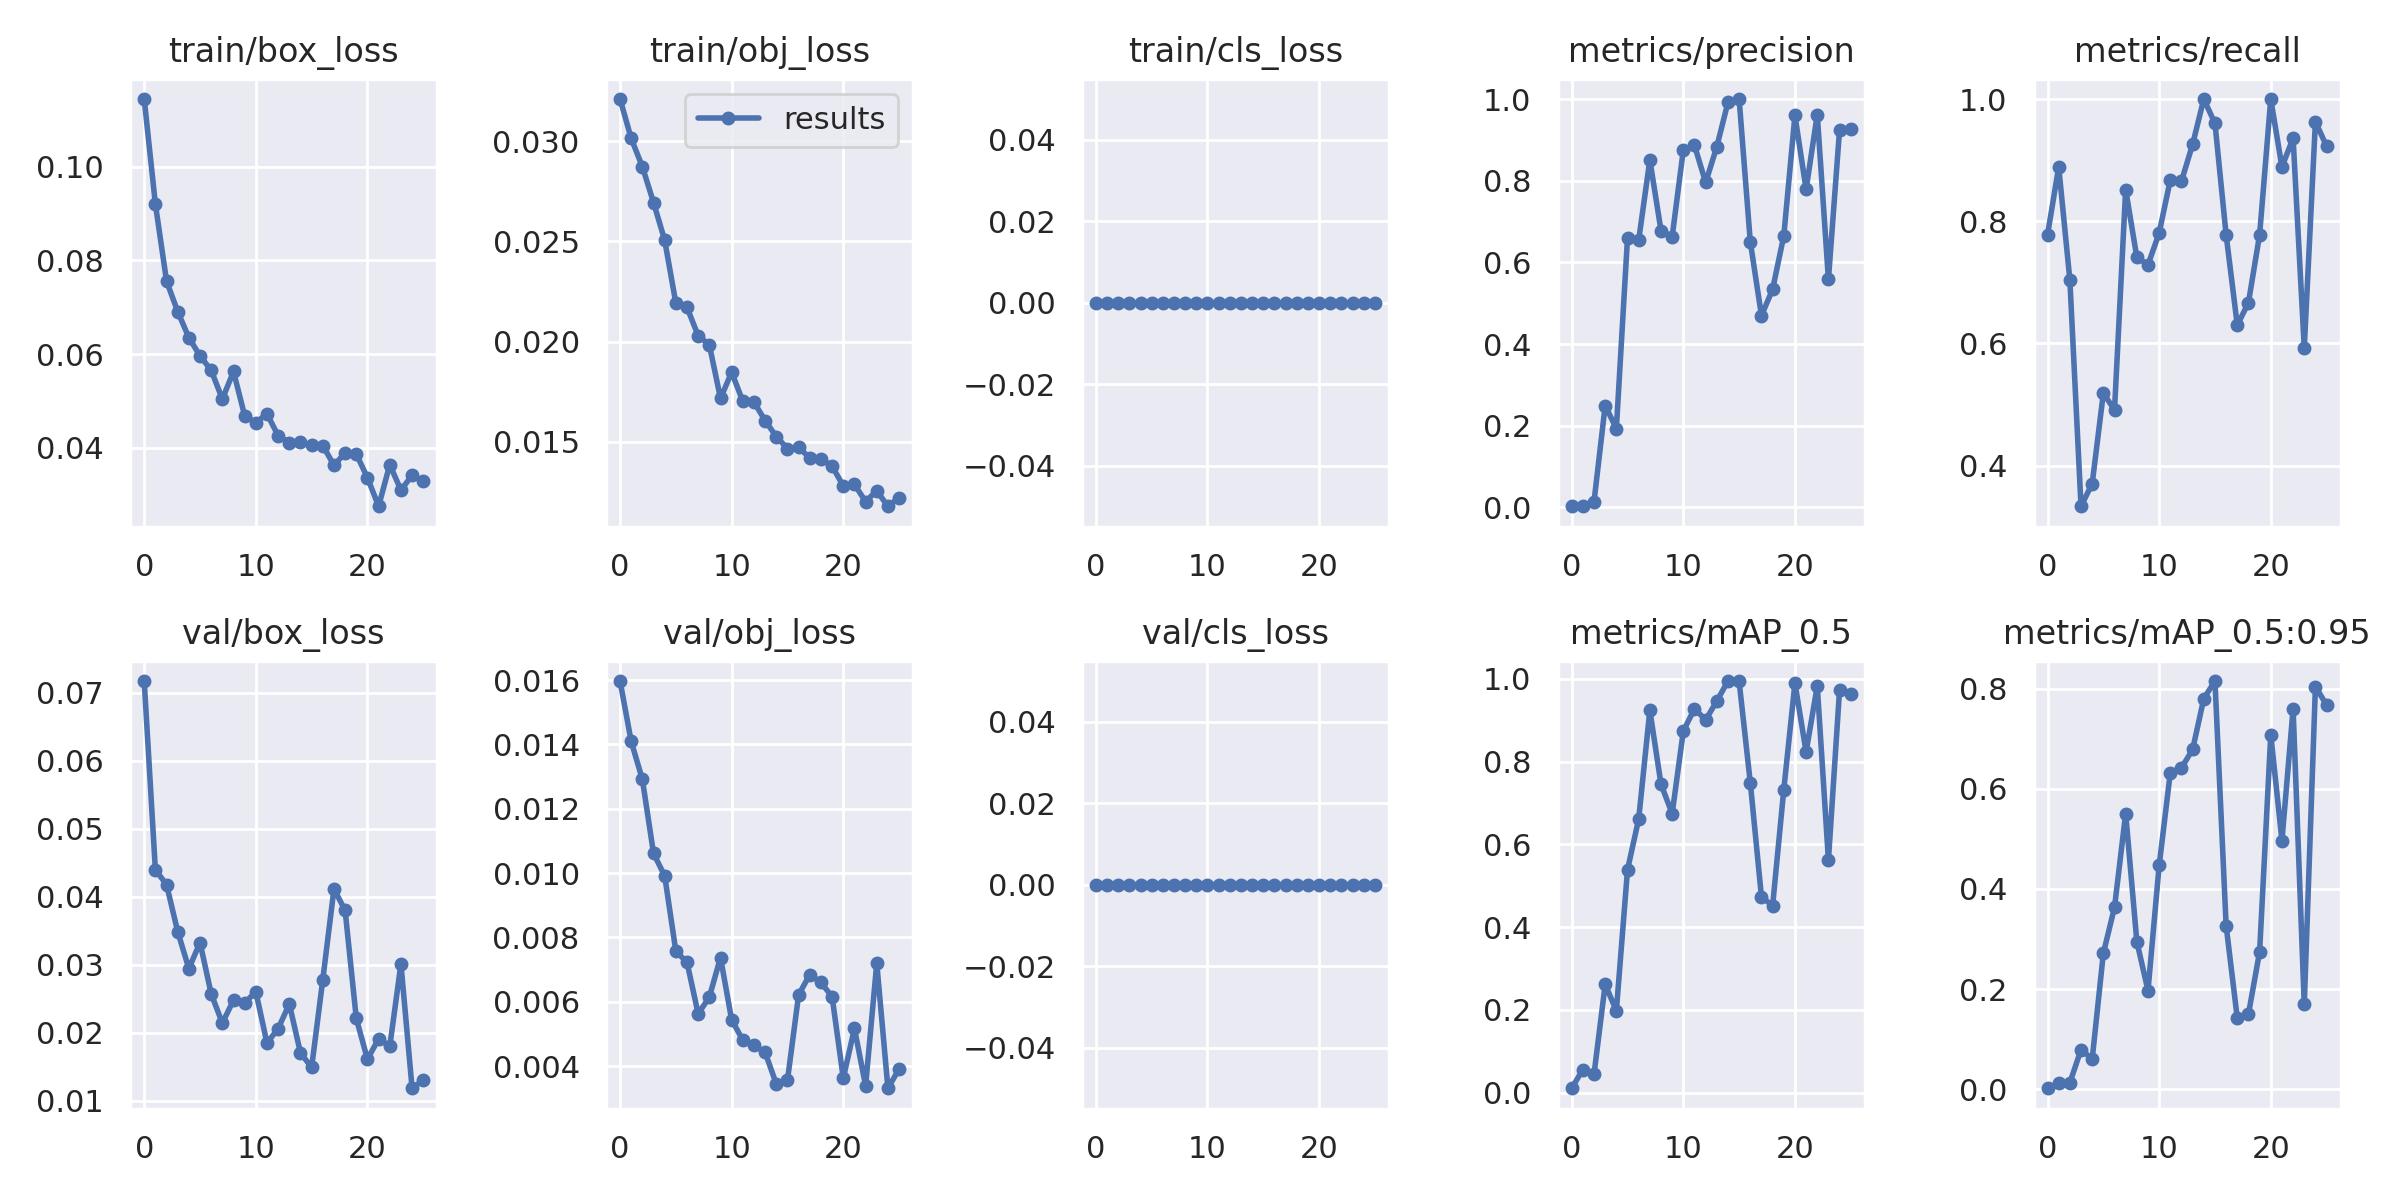

In [ ]:
# train 그래프
Image('/content/drive/MyDrive/yolov5/runs/train/exp2/results.png')

# 결과 확인

  * --conf 0.35
    - 정확도 0.25 -> 0.35 : 정확도가  0.35 이상인 것만 보여줌

  * --weights : 가중치 best로 바꿔주기(/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt)

  * --source : 검사하고 싶은 파일 저장경로

- 혹시 이미지를 드라이브 안의 폴더로  추가할 때 직접 구글 드라이브로 들어가서 하면 인식이 안될 수 도 있음 
- 이때 corab에서 직접 파일 업로드해야 인식함

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.2 --source /content/drive/MyDrive/청치마-1/son
# detect.py : 객체탐지 할떄 사용 하는 파일(predict 같은거)

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/청치마-1/son, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/drive/MyDrive/청치마-1/son/우유곽 연습1.PNG: 384x640 1 milk, 12.3ms
image 2/2 /content/drive/MyDrive/청치마-1/son/우유곽 연습2.PNG: 512x640 1 milk, 17.9ms
Speed: 0.5ms pre-process, 15.1ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect

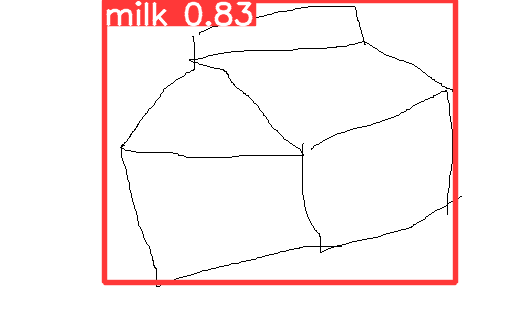

In [ ]:
Image('/content/drive/MyDrive/yolov5/runs/detect/exp/우유곽 연습1.PNG')

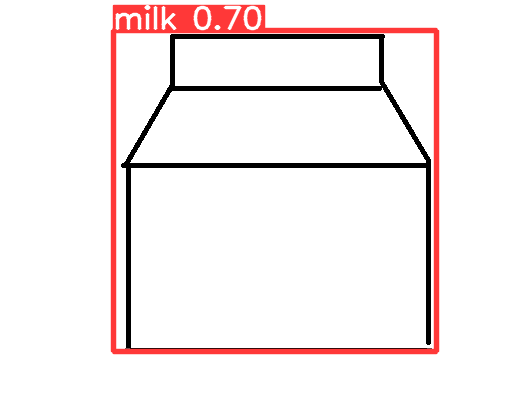

In [ ]:
Image('/content/drive/MyDrive/yolov5/runs/detect/exp/우유곽 연습2.PNG')

# 영상 

* 경로(--source)만 영상이 있는 곳으로 바꿔주기


In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.2 --source /content/drive/MyDrive/청치마-1/video_test/KakaoTalk_20221226_171111630.mp4

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/청치마-1/video_test/KakaoTalk_20221226_171111630.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/96) /content/drive/MyDrive/청치마-1/video_test/KakaoTalk_20221226_171111630.mp4: 384x640 3 milks, 12.1ms
video 1/1 (2/96) /content/drive/MyDrive/청치마-1/video_test/KakaoTalk_20221226_171111630.mp4: 384x640 3 milks, 8.5ms
video 1/1 (3/96) /conte

In [ ]:
# 동영상 다운해서 확인해보기

ValueError: ignored

In [ ]:
# 데이터 양을 많이 만들고, 학습을 많이 시켜야함(ephoc 수를 많이 늘려야함)